In [1]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

#Reading the data
df = pd.read_csv('ifood_df.csv')

# Display the structure of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [2]:
# Display the summary statistics of the dataframe
print(df.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [3]:
# Check for missing values
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [4]:
# Handle missing values (example: fill missing values with the mean of the column)
# You can use other methods like filling with median, mode, or dropping rows/columns
df.fillna(df.mean(), inplace=True)

In [5]:
# Verify that there are no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntReg

In [6]:
# Check for duplicate rows in the dataset
print("\nNumber of duplicate rows in the dataset:")
print(df.duplicated().sum())


Number of duplicate rows in the dataset:
184


In [7]:
# Calculate average purchase value
average_purchase_value = df['MntTotal'].mean()
print("\nAverage Purchase Value: {:.2f}".format(average_purchase_value))


Average Purchase Value: 562.76


In [8]:
# Calculate purchase frequency
df['total_purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
purchase_frequency = df['total_purchase'].mean()
print("Average Purchase Frequency: {:.2f}".format(purchase_frequency))

Average Purchase Frequency: 14.89


In [9]:
# Calculate the number of complaints
number_of_complaints = df['Complain'].sum()
print("Number of Complaints: {}".format(number_of_complaints))

Number of Complaints: 20


In [10]:
# Calculate the acceptance rate of campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCmp'] = df[campaign_columns].sum(axis=1)
average_campaign_acceptance_rate = df['TotalAcceptedCmp'].mean()
print("Average Campaign Acceptance Rate: {:.2f}".format(average_campaign_acceptance_rate))

Average Campaign Acceptance Rate: 0.30


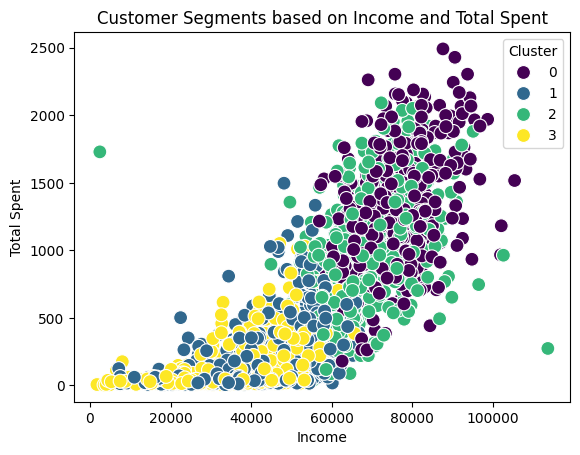

In [11]:
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Income', 'Recency', 'MntTotal', 'NumWebVisitsMonth']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Determine the optimal number of clusters using the elbow method
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments based on Income and Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend(title='Cluster')
plt.show()

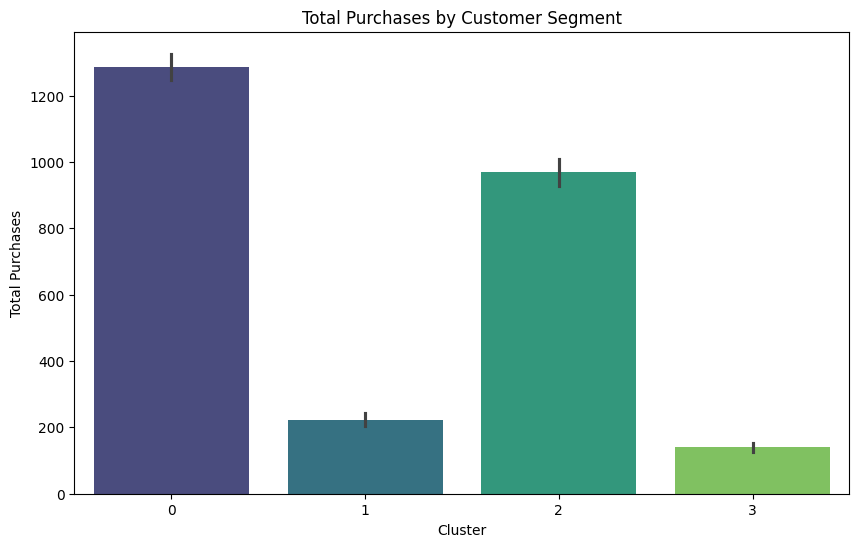

In [12]:
# Visualization: Bar chart of Total Purchases by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='MntTotal', data=df, palette='viridis')
plt.title('Total Purchases by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Total Purchases')
plt.show()

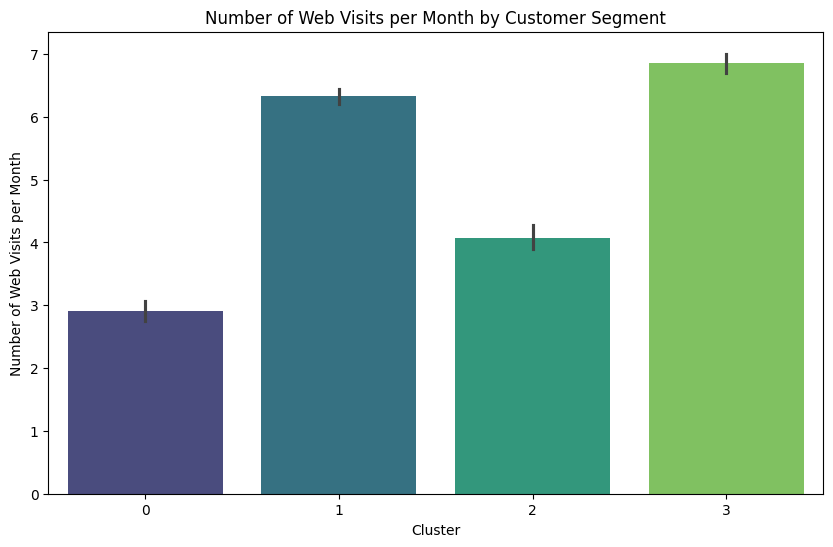

In [13]:
# Visualization: Bar chart of NumWebVisitsMonth by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='NumWebVisitsMonth', data=df, palette='viridis')
plt.title('Number of Web Visits per Month by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Number of Web Visits per Month')
plt.show()

In [14]:
# Analyze characteristics of each segment and provide insights

# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster').mean()

# Print mean values for each cluster
print("\nMean values for each cluster:")
print(cluster_means)

# Analyze characteristics and provide insights
for i in range(optimal_clusters):
    
    # Provide insights based on cluster characteristics
    print("Average Income:", cluster_means.loc[i, 'Income'])
    print("Average Recency:", cluster_means.loc[i, 'Recency'])
    print("Average Total Purchases:", cluster_means.loc[i, 'MntTotal'])
    print("Average Number of Web Visits per Month:", cluster_means.loc[i, 'NumWebVisitsMonth'])


Mean values for each cluster:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        75594.158621  0.052874  0.319540  69.804598  642.514943  59.622989   
1        40560.530792  0.653959  0.596774  74.673021  142.630499   9.148094   
2        68764.325275  0.118681  0.584615  23.756044  539.391209  48.169231   
3        34744.407583  0.714060  0.481833  25.219589   83.573460   6.519747   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             430.229885        89.583908         64.772414     75.022989   
1              48.152493        13.385630         10.117302     29.480938   
2             271.318681        63.120879         46.046154     65.312088   
3              33.290679        10.165877          5.988942     23.203791   

         ...  education_2n Cycl